Page sequence: [1, 2, 3, 1, 2, 4, 5]
Page hits: 2
Page faults: 5
Hit ratio: 0.29
Fault ratio: 0.71


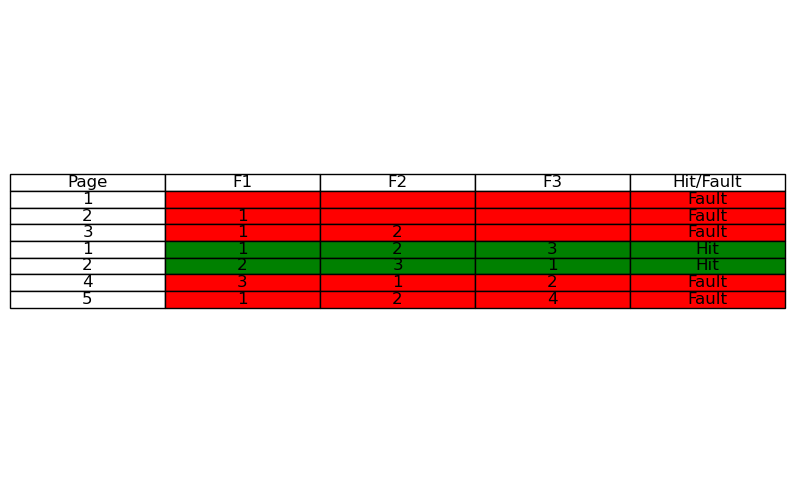

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class LRUPageReplacement:
    def __init__(self, num_frames):
        self.num_frames = num_frames
        self.frames = []
        self.page_faults = 0
        self.page_hits = 0
        self.page_sequence = []
        self.page_steps = []

    def access_page(self, page):
        step = {"Page": page, "Hit/Fault": "Fault"}
        
        # Track the current state of frames
        frame_state = list(self.frames)
        
        if page in self.frames:
            # Page hit: move the page to the most recently used
            self.page_hits += 1
            step["Hit/Fault"] = "Hit"
            self.page_steps.append((page, frame_state, "Hit"))
            # Move the page to the end (most recently used)
            self.frames.remove(page)
            self.frames.append(page)
            return
        
        # Page fault: add the page or replace the least recently used page
        if len(self.frames) < self.num_frames:
            self.frames.append(page)
        else:
            self.frames.pop(0)  # Remove the least recently used page
            self.frames.append(page)
        
        self.page_faults += 1
        self.page_steps.append((page, frame_state, "Fault"))

    def simulate(self, page_sequence):
        self.page_sequence = page_sequence
        for page in page_sequence:
            self.access_page(page)

    def print_results(self):
        print(f"Page sequence: {self.page_sequence}")
        print(f"Page hits: {self.page_hits}")
        print(f"Page faults: {self.page_faults}")
        print(f"Hit ratio: {self.page_hits / len(self.page_sequence):.2f}")
        print(f"Fault ratio: {self.page_faults / len(self.page_sequence):.2f}")

    def display_table(self):
        # Create DataFrame with steps for displaying
        data = []
        for page, frame_state, hit_fault in self.page_steps:
            row = {'Page': page}
            # Fill in frame columns (F1, F2, ..., Fn)
            for i in range(self.num_frames):
                row[f"F{i+1}"] = frame_state[i] if i < len(frame_state) else ""
            row['Hit/Fault'] = hit_fault
            data.append(row)

        df = pd.DataFrame(data)
        
        # Create a custom color map for frames (Faults in red, Hits in green)
        cmap = ListedColormap(['red', 'green'])
        
        # Create a figure and axis for the table
        fig, ax = plt.subplots(figsize=(10, 6))  # Set table size
        ax.axis('off')  # Hide axes
        
        # Create the table
        table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        
        # Apply color to the frame columns (F1, F2, ..., Fn)
        for i, (page, frame_state, hit_fault) in enumerate(self.page_steps):
            for j in range(self.num_frames):
                # Color the frames red for faults, green for hits
                color_idx = 1 if hit_fault == "Hit" else 0
                table[(i + 1, j + 1)].set_facecolor(cmap(color_idx))  # Set color for each frame cell
            # Color the "Hit/Fault" column
            table[(i + 1, self.num_frames + 1)].set_facecolor(cmap(1 if hit_fault == "Hit" else 0))
        
        # Show the table
        plt.show()


# Get user input for the simulation
num_frames = int(input("Enter the number of frames: "))
page_sequence_input = input("Enter the page reference string (space-separated): ")
page_sequence = list(map(int, page_sequence_input.split()))

# Initialize the LRU Page Replacement
lru = LRUPageReplacement(num_frames)

# Simulate the page replacement
lru.simulate(page_sequence)

# Print results
lru.print_results()

# Display the table showing the page replacement process
lru.display_table()

Page sequence: [1, 2, 3, 1, 2, 4, 5]
Page hits: 2
Page faults: 5
Hit ratio: 0.29
Fault ratio: 0.71


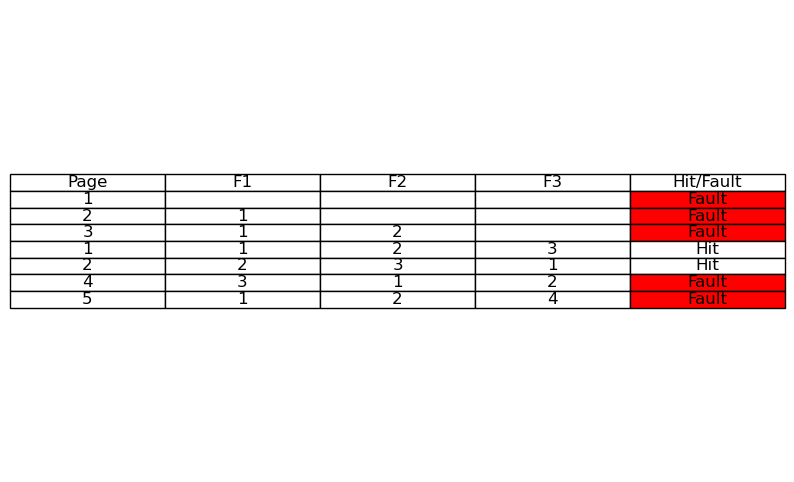

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class LRUPageReplacement:
    def __init__(self, num_frames):
        self.num_frames = num_frames
        self.frames = []
        self.page_faults = 0
        self.page_hits = 0
        self.page_sequence = []
        self.page_steps = []

    def access_page(self, page):
        step = {"Page": page, "Hit/Fault": "Fault"}
        
        # Track the current state of frames
        frame_state = list(self.frames)
        
        if page in self.frames:
            # Page hit: move the page to the most recently used
            self.page_hits += 1
            step["Hit/Fault"] = "Hit"
            self.page_steps.append((page, frame_state, "Hit"))
            # Move the page to the end (most recently used)
            self.frames.remove(page)
            self.frames.append(page)
            return
        
        # Page fault: add the page or replace the least recently used page
        if len(self.frames) < self.num_frames:
            self.frames.append(page)
        else:
            self.frames.pop(0)  # Remove the least recently used page
            self.frames.append(page)
        
        self.page_faults += 1
        self.page_steps.append((page, frame_state, "Fault"))

    def simulate(self, page_sequence):
        self.page_sequence = page_sequence
        for page in page_sequence:
            self.access_page(page)

    def print_results(self):
        print(f"Page sequence: {self.page_sequence}")
        print(f"Page hits: {self.page_hits}")
        print(f"Page faults: {self.page_faults}")
        print(f"Hit ratio: {self.page_hits / len(self.page_sequence):.2f}")
        print(f"Fault ratio: {self.page_faults / len(self.page_sequence):.2f}")

    def display_table(self):
        # Create DataFrame with steps for displaying
        data = []
        for page, frame_state, hit_fault in self.page_steps:
            row = {'Page': page}
            # Fill in frame columns (F1, F2, ..., Fn)
            for i in range(self.num_frames):
                row[f"F{i+1}"] = frame_state[i] if i < len(frame_state) else ""
            row['Hit/Fault'] = hit_fault
            data.append(row)

        df = pd.DataFrame(data)
        
        # Create a custom color map for frames (Faults in red, Hits in white or no color)
        cmap = ListedColormap(['red', 'white'])
        
        # Create a figure and axis for the table
        fig, ax = plt.subplots(figsize=(10, 6))  # Set table size
        ax.axis('off')  # Hide axes
        
        # Create the table
        table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        
        # Apply color to the frame columns (F1, F2, ..., Fn) based on page fault
        for i, (page, frame_state, hit_fault) in enumerate(self.page_steps):
            for j in range(self.num_frames):
                # Only color the frames involved in the page fault
                if hit_fault == "Fault" and j < len(frame_state) and frame_state[j] == page:
                    table[(i + 1, j + 1)].set_facecolor(cmap(0))  # Set red color for fault cells
                else:
                    table[(i + 1, j + 1)].set_facecolor(cmap(1))  # No color for non-fault cells
            # Color the "Hit/Fault" column
            table[(i + 1, self.num_frames + 1)].set_facecolor(cmap(1 if hit_fault == "Hit" else 0))
        
        # Show the table
        plt.show()


# Get user input for the simulation
num_frames = int(input("Enter the number of frames: "))
page_sequence_input = input("Enter the page reference string (space-separated): ")
page_sequence = list(map(int, page_sequence_input.split()))

# Initialize the LRU Page Replacement
lru = LRUPageReplacement(num_frames)

# Simulate the page replacement
lru.simulate(page_sequence)

# Print results
lru.print_results()

# Display the table showing the page replacement process
lru.display_table()

Page sequence: [1, 2, 3, 1, 2, 4, 5]
Page hits: 2
Page faults: 5
Hit ratio: 0.29
Fault ratio: 0.71


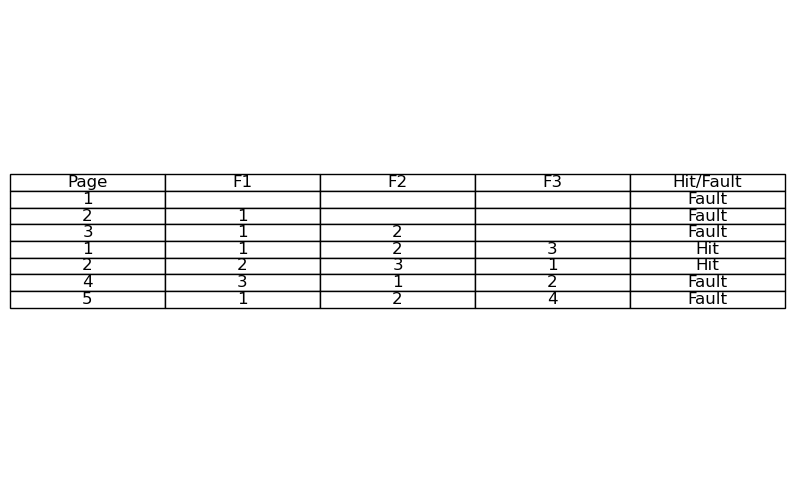

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

class LRUPageReplacement:
    def __init__(self, num_frames):
        self.num_frames = num_frames
        self.frames = []
        self.page_faults = 0
        self.page_hits = 0
        self.page_sequence = []
        self.page_steps = []

    def access_page(self, page):
        step = {"Page": page, "Hit/Fault": "Fault"}
        
        # Track the current state of frames
        frame_state = list(self.frames)
        
        if page in self.frames:
            # Page hit: move the page to the most recently used
            self.page_hits += 1
            step["Hit/Fault"] = "Hit"
            self.page_steps.append((page, frame_state, "Hit"))
            # Move the page to the end (most recently used)
            self.frames.remove(page)
            self.frames.append(page)
            return
        
        # Page fault: add the page or replace the least recently used page
        if len(self.frames) < self.num_frames:
            self.frames.append(page)
        else:
            self.frames.pop(0)  # Remove the least recently used page
            self.frames.append(page)
        
        self.page_faults += 1
        self.page_steps.append((page, frame_state, "Fault"))

    def simulate(self, page_sequence):
        self.page_sequence = page_sequence
        for page in page_sequence:
            self.access_page(page)

    def print_results(self):
        print(f"Page sequence: {self.page_sequence}")
        print(f"Page hits: {self.page_hits}")
        print(f"Page faults: {self.page_faults}")
        print(f"Hit ratio: {self.page_hits / len(self.page_sequence):.2f}")
        print(f"Fault ratio: {self.page_faults / len(self.page_sequence):.2f}")

    def display_table(self):
        # Create DataFrame with steps for displaying
        data = []
        for page, frame_state, hit_fault in self.page_steps:
            row = {'Page': page}
            # Fill in frame columns (F1, F2, ..., Fn)
            for i in range(self.num_frames):
                row[f"F{i+1}"] = frame_state[i] if i < len(frame_state) else ""
            row['Hit/Fault'] = hit_fault
            data.append(row)

        df = pd.DataFrame(data)

        # Create a figure and axis for the table
        fig, ax = plt.subplots(figsize=(10, 6))  # Set table size
        ax.axis('off')  # Hide axes
        
        # Create the table
        table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        
        # Show the table
        plt.show()


# Get user input for the simulation
num_frames = int(input("Enter the number of frames: "))
page_sequence_input = input("Enter the page reference string (space-separated): ")
page_sequence = list(map(int, page_sequence_input.split()))

# Initialize the LRU Page Replacement
lru = LRUPageReplacement(num_frames)

# Simulate the page replacement
lru.simulate(page_sequence)

# Print results
lru.print_results()

# Display the table showing the page replacement process
lru.display_table()

In [23]:
import pandas as pd
import plotly.graph_objects as go

class LRUPageReplacement:
    def __init__(self, num_frames):
        self.num_frames = num_frames
        self.frames = []
        self.page_faults = 0
        self.page_hits = 0
        self.page_sequence = []
        self.page_steps = []

    def access_page(self, page):
        step = {"Page": page, "Hit/Fault": "Fault"}
        
        # Track the current state of frames
        frame_state = list(self.frames)
        
        if page in self.frames:
            # Page hit: move the page to the most recently used
            self.page_hits += 1
            step["Hit/Fault"] = "Hit"
            self.page_steps.append((page, frame_state, "Hit"))
            # Move the page to the end (most recently used)
            self.frames.remove(page)
            self.frames.append(page)
            return
        
        # Page fault: add the page or replace the least recently used page
        if len(self.frames) < self.num_frames:
            self.frames.append(page)
        else:
            self.frames.pop(0)  # Remove the least recently used page
            self.frames.append(page)
        
        self.page_faults += 1
        self.page_steps.append((page, frame_state, "Fault"))

    def simulate(self, page_sequence):
        self.page_sequence = page_sequence
        for page in page_sequence:
            self.access_page(page)

    def print_results(self):
        print(f"Page sequence: {self.page_sequence}")
        print(f"Page hits: {self.page_hits}")
        print(f"Page faults: {self.page_faults}")
        print(f"Hit ratio: {self.page_hits / len(self.page_sequence):.2f}")
        print(f"Fault ratio: {self.page_faults / len(self.page_sequence):.2f}")

    def display_table(self):
        # Create DataFrame with steps for displaying
        data = []
        for page, frame_state, hit_fault in self.page_steps:
            row = {'Page': page}
            # Fill in frame columns (F1, F2, ..., Fn)
            for i in range(self.num_frames):
                row[f"F{i+1}"] = frame_state[i] if i < len(frame_state) else ""
            row['Hit/Fault'] = hit_fault
            data.append(row)

        df = pd.DataFrame(data)

        # Create Plotly table
        fig = go.Figure(data=[go.Table(
            header=dict(values=["Page"] + [f"F{i+1}" for i in range(self.num_frames)] + ["Hit/Fault"],
                        fill_color='paleturquoise', align='center'),
            cells=dict(values=[df['Page']] + [df[f"F{i+1}"] for i in range(self.num_frames)] + [df['Hit/Fault']],
                       fill_color='lavender', align='center'))
        ])

        # Update layout for better presentation
        fig.update_layout(
            title="LRU Page Replacement Process",
            height=400,
            width=800
        )

        # Show the table
        fig.show()


# Get user input for the simulation
num_frames = int(input("Enter the number of frames: "))
page_sequence_input = input("Enter the page reference string (space-separated): ")
page_sequence = list(map(int, page_sequence_input.split()))

# Initialize the LRU Page Replacement
lru = LRUPageReplacement(num_frames)

# Simulate the page replacement
lru.simulate(page_sequence)

# Print results
lru.print_results()

# Display the table showing the page replacement process
lru.display_table()

Page sequence: [1, 2, 3, 1, 2, 4, 5]
Page hits: 2
Page faults: 5
Hit ratio: 0.29
Fault ratio: 0.71
